# Sentiment Analysis for European Hotel Reviews

In this project, we will take analyze positive and negative hotel reviews and design a model for inferring positive or negative sentiment given a review. We combine a pretrained BERT lanuguage model and a custom multi-layer perceptron to achieve this.

## 1. Exploratory Data Analysis

### 1.1 Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

### 1.2 Taking a Look at our Data

In this subsection, we take a look at our dataset to get a better sense of it.

In [2]:
df = pd.read_csv('Hotel_Reviews.csv')

In [3]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [5]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


Checking for missing values:

In [6]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

Looks like we only have missing values in the latitude and longitude columns. That's good! 😃

### 1.3 Analyzing Average Ratings
Our goal is to predict sentiment, but it's interesting to analyze the ratings data, which is what we do in this subsection.

In [7]:
df_ratings = df[['Hotel_Name','Average_Score']].drop_duplicates() # Drop duplicates
df_ratings.head()

,Hotel_Name,Average_Score
0,Hotel Arena,7.7
405,K K Hotel George,8.5
971,Apex Temple Court Hotel,9.2
2008,The Park Grand London Paddington,7.7
3778,Monhotel Lounge SPA,8.4


Text(0.5, 1.0, 'Distribution of Hotel Average Ratings')

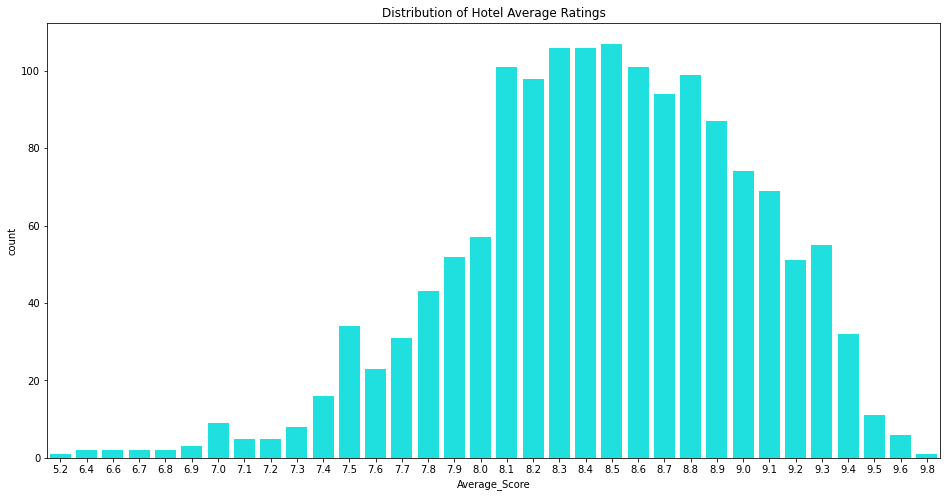

In [8]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Average_Score',data = df_ratings,color = 'cyan')
plt.title("Distribution of Hotel Average Ratings")

In [9]:
df_ratings.sort_values(by='Average_Score', ascending=False)[:5]

,Hotel_Name,Average_Score
54717,Ritz Paris,9.8
176997,H tel de La Tamise Esprit de France,9.6
398945,Hotel The Serras,9.6
402244,H10 Casa Mimosa 4 Sup,9.6
14708,Haymarket Hotel,9.6


Looks like the Ritz Paris is the higest rated of the hotels in our dataset. Sounds fancy so that makes sense I guess. 😅

In [10]:
df_ratings.sort_values(by='Average_Score')[:5]

,Hotel_Name,Average_Score
494791,Hotel Liberty,5.2
242324,Hotel Cavendish,6.4
323302,Savoy Hotel Amsterdam,6.4
157843,Best Western Maitrise Hotel Edgware Road,6.6
129781,The Tophams Hotel,6.6


And these are the lowest rated hotels, Hotel Liberty having a particular low average rating.

<AxesSubplot:title={'center':'Hotel distribution in European countries'}>

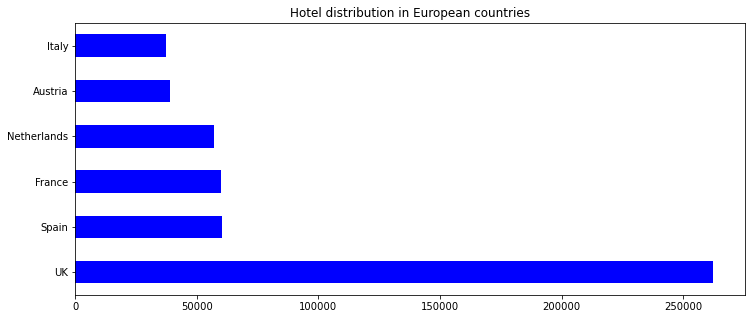

In [11]:
# We check out the distribution of hotels in the European countries
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK') # Replacing 'united kingdom' with 'UK' for easy use
df['EC'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1]) # Splitting the hotel address and picking out the last string which would be the countries
#Plotting with matplotlib 
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in European countries')
df.EC.value_counts().plot.barh(color = 'blue')

In [12]:
df.groupby(['EC']).mean()["Average_Score"].sort_values(ascending=False)

EC
Austria        8.558034
Spain          8.522812
Italy          8.426729
France         8.409053
Netherlands    8.387085
UK             8.340393
Name: Average_Score, dtype: float64

We see that Austrian hotels have the highest average rating and the UK hotels have the lowest. Very interesting!

### 1.4 Visualizing the Reviews

In this section, we use data visualization to get a rich view of the word distributions in both positive and negative review categories.

In [14]:
import nltk 
from nltk import FreqDist
import re 
import spacy 

#### 1.4.1 Data Pre-Processing

First, we have to remove entries that say "No Negative" in our Negative Reviews column and those that say "No Positive" in our Positive Reviews column.

In [15]:
neg = pd.Series([x for x in df.Negative_Review if x!="No Negative"])

In [16]:
len(neg)

387848

In [17]:
pos = pd.Series([x for x in df.Positive_Review if x!="No Positive"])

In [18]:
len(pos)

479792

We now remove unwanted characters from our data:

In [19]:
neg = neg.str.replace("[^a-zA-Z#]", " ")
pos = pos.str.replace("[^a-zA-Z#]", " ")

Next we filter out stopwords such as "the", "is", and "and". Note: Removing stopwords here is just for the purpose of visualizing which verbs, adjectives, and nouns are most concuurent with the respective sentiments. But when using the BERT model for machine learning we will retain the stopwords.

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uyiosaoriakhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(sent: list) -> str:
    """
    A function to remove stopwords
    """
    sent_new = " ".join([w for w in sent if w.lower() not in stop_words])
    return sent_new

In [22]:
# remove stopwords from our data
neg_2 = [remove_stopwords(r.split()) for r in neg]
pos_2 = [remove_stopwords(r.split()) for r in pos]

#### 1.4.2 Plotting Most Frequent Words

We now plot the most frequent words using our pre-processed datasets.

In [23]:
def plot_word_freq(corpus, n_words = 20):
    """
    a function to plot the most frequently occurring words in a corpus
    """
    all_words = ' '.join([text for text in corpus])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # plot frequency of top n most frequent words
    d = words_df.nlargest(columns="count", n = n_words) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

Positve Reviews


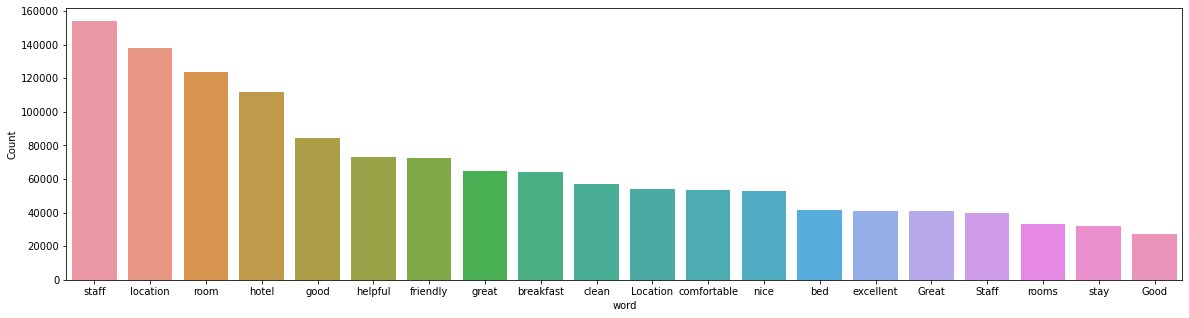

In [25]:
print("Positve Reviews")
plot_word_freq(pos_2)

Negative Reviews


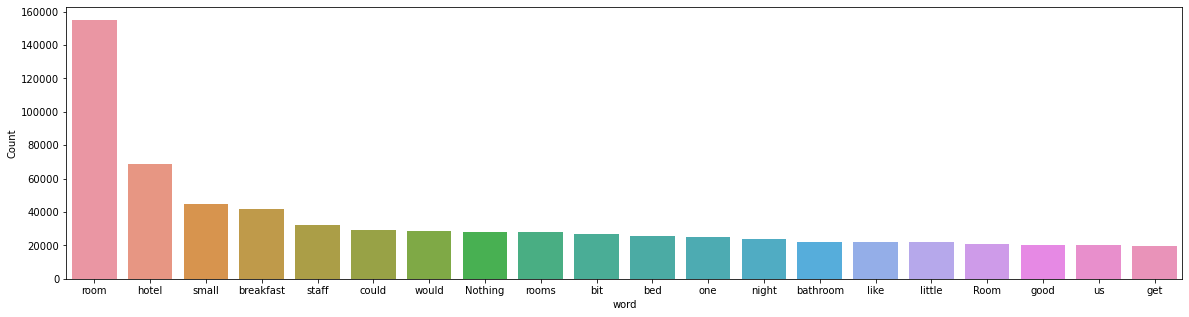

In [26]:
print("Negative Reviews")
plot_word_freq(neg_2)

#### 1.4.3 Word Cloud

Here to plot the word cloud, which is always a nice graphic 😊

In [27]:
# Using wordcloud to visually represent the text data
def make_wordcloud(corpus, color = 'black'):
    """
    A function to create a word cloud from a corpus of words
    """
    words = ' '.join(corpus)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    return wordcloud

Text(0.5, 1.0, 'Negative Reviews')

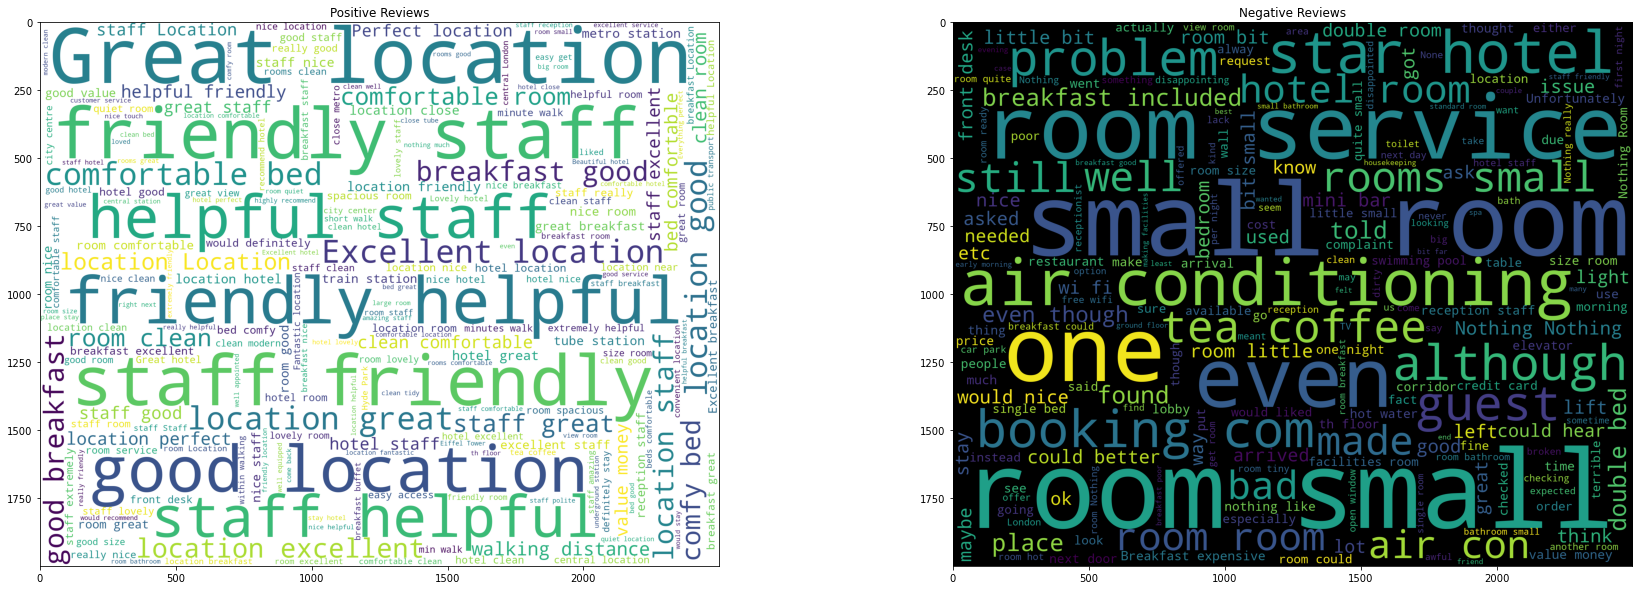

In [28]:
pos_wordcloud = make_wordcloud(pos_2,'white')
neg_wordcloud = make_wordcloud(neg_2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
axes[0].imshow(pos_wordcloud)
axes[0].set_title("Positive Reviews")
axes[1].imshow(neg_wordcloud)
axes[1].set_title("Negative Reviews")

## 2. Data Preparation for BERT

There are three things we need to do to convert our data into a form amenable to BERT. These are:

i) Pad all sequences to a constant length

ii) Create an attention mask

iii) Add special tokens: [SEP] which indicates the end of a sentence, and [CLS] which indicates that the task is classification

In [29]:
# Load required libraries
from sklearn .model_selection import train_test_split
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import Dataset, DataLoader

Let's use the cased version of BERT.

In [30]:
bert_model_name = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

### 2.1 Setting up our Data

We set up our training, validation, and test data and also decide the maximum sequence length to specify for the BERT model.

In [31]:
neg_df = pd.DataFrame.from_dict({"review":list(neg),"sentiment":[0 for x in neg]})
pos_df = pd.DataFrame.from_dict({"review":list(pos),"sentiment":[1 for x in pos]})
reviews = pd.concat([pos_df,neg_df],axis=0)

In [32]:
reviews

,review,sentiment
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1
...,...,...
387843,No parking Public parking garage is Euro p...,0
387844,no trolly or staff to help you take the lugga...,0
387845,The hotel looks like but surely not,0
387846,The ac was useless It was a hot week in vienn...,0


In [33]:
all_tokens = [tokenizer.tokenize(x) for x in reviews.review]

Text(0.5, 1.0, 'Distribution of Tokenized Review Lengths')

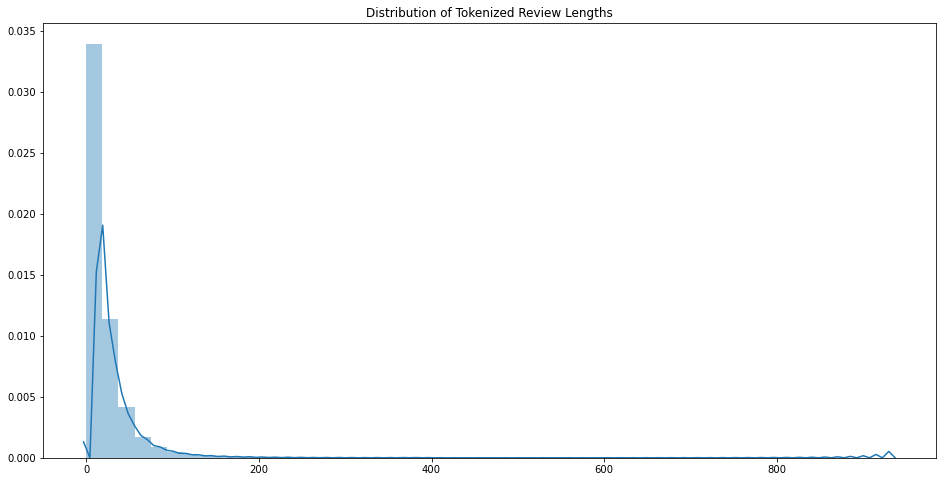

In [34]:
plt.figure(figsize = (16,8))
sns.distplot([len(x) for x in all_tokens])
plt.title("Distribution of Tokenized Review Lengths")

Looks like almost all reviews contain 200 or fewer tokens, let's calculate the exact proportion:

In [37]:
print("Proportion of tokenized reviews with length <= 200: ")
len([x for x in all_tokens if len(x)<=200])/len([x for x in all_tokens])

Proportion of tokenized reviews with length <= 200: 


0.9965204462680375

That is a very large proportion so we use 200 as our max sequence length in our BERT model.

### 2.2 Setting up our Dataloaders

#### 2.2.1 Creating a PyTorch Dataset

In [174]:
class ReviewDataset(Dataset):
    """
    a pytorch dataset object for our reviews
    """
    
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(
          review,
          add_special_tokens=True,
          max_length=self.max_len,
          return_token_type_ids=False,
          pad_to_max_length=True,
          return_attention_mask=True,
          return_tensors='pt',
        )
        return {
          'review_text': review,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
        }

#### 2.2.2 Creating the Dataloaders

In [175]:
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = ReviewDataset(
    reviews=df.review.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
    return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )


0          I am so angry that i made this post available...
1          Rooms are nice but for elderly a bit difficul...
2          My room was dirty and I was afraid to walk ba...
3          You When I booked with your company on line y...
4          Backyard of the hotel is total mess shouldn t...
                                ...                        
387843     No parking Public parking garage is    Euro p...
387844     no trolly or staff to help you take the lugga...
387845             The hotel looks like   but surely not   
387846     The ac was useless It was a hot week in vienn...
387847         I was in  rd floor It didn t work Free Wife 
Length: 387848, dtype: object

In [168]:
df["Negative_Review"][:4].to_numpy()

array([' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to 